In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.titlesize'] = 18

In [58]:
winners = pd.read_csv('windelta.csv', delimiter='|')
winners['inserted_at'] = pd.to_datetime(winners['inserted_at'], format="%Y-%m-%d %H:%M:%S.%f")
winners.head()

,inserted_at,slot,value,hash
0,2023-02-24 15:50:23.680712,5869150,75454354173452880,0x9b3af2
1,2023-02-24 15:51:23.686856,5869155,138807147878308192,0x03d09f
2,2023-02-24 15:53:00.487982,5869163,50874348025890567,0xbf9969
3,2023-02-24 15:53:23.687311,5869165,39920149754212144,0x6ca72f
4,2023-02-24 15:55:24.006246,5869175,52699372202476983,0x56cc15


In [59]:
winners['slot_boundary'] = np.asarray([pd.Timestamp(x).round(freq='12S') for x in winners['inserted_at'].values])
winners['deltas_us'] = [int(abs(winners['slot_boundary'].values[i] - winners['inserted_at'].values[i]) / np.timedelta64(1, 'us')) for i in range(len(winners))]
winners.head()

,inserted_at,slot,value,hash,slot_boundary,deltas_us
0,2023-02-24 15:50:23.680712,5869150,75454354173452880,0x9b3af2,2023-02-24 15:50:24,319288
1,2023-02-24 15:51:23.686856,5869155,138807147878308192,0x03d09f,2023-02-24 15:51:24,313144
2,2023-02-24 15:53:00.487982,5869163,50874348025890567,0xbf9969,2023-02-24 15:53:00,487982
3,2023-02-24 15:53:23.687311,5869165,39920149754212144,0x6ca72f,2023-02-24 15:53:24,312689
4,2023-02-24 15:55:24.006246,5869175,52699372202476983,0x56cc15,2023-02-24 15:55:24,6246


In [62]:
# write file for winning hash and slots
f = open('winninghashslots.txt', 'w')
slots = winners['slot'].values
hashes = winners['hash'].values
for i in range(len(slots)):
    f.write('{} {}\n'.format(slots[i], hashes[i]))
f.close()

No handles with labels found to put in legend.


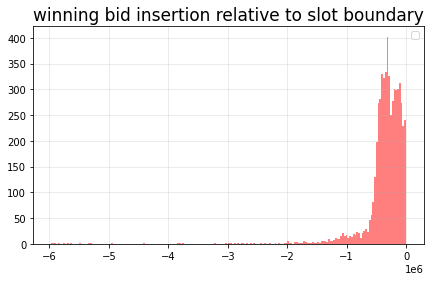

In [56]:
f, ax = plt.subplots(figsize=(7,4))
ax.hist(-winners['deltas_us'].values, bins=200, color='r', alpha=0.5)
ax.set_title('winning bid insertion relative to slot boundary', size=17)
ax.legend()
plt.show()

In [ ]:
5871455 | 129950328944496910 | 0x9f932b | 2023-02-24 23:31:23.100975 | 2023-02-24 23:31:22.658242
5871464 | 30299114148783804 | 0x2455e7 | 2023-02-24 23:33:11.288911 | 2023-02-24 23:33:11.091177